# Drugi dio projekta - replikacija rezultata iz članka

In [580]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

Učitajmo najprije podatke potrebne za rad.

In [581]:
teams = pd.read_csv("./data/proj2/teams.csv")
seasons = pd.read_csv("./data/proj2/seasons.csv")

season_compact_results = pd.read_csv("./data/proj2/regular_season_compact_results.csv")
season_detailed_results = pd.read_csv("./data/proj2/regular_season_detailed_results.csv")

tourney_compact_results = pd.read_csv("./data/proj2/tourney_compact_results.csv")
tourney_detailed_results = pd.read_csv("./data/proj2/tourney_detailed_results.csv")


Uklonimo zatim podatke koji nam neće trebati (sezone koje nisu uzete u obzir prilikom izvođenja rada).

In [582]:
seasons = seasons[(seasons.season == 2011) | (seasons.season == 2012) | (seasons.season == 2013) | (seasons.season == 2014)]

seasons

,season,dayzero,regionW,regionX,regionY,regionZ
26,2011,11/01/2010,East,West,Southeast,Southwest
27,2012,10/31/2011,East,Midwest,South,West
28,2013,11/05/2012,East,South,Midwest,West
29,2014,11/04/2013,East,South,Midwest,West


In [583]:
teams

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M
...,...,...
359,1460,Wright St
360,1461,Wyoming
361,1462,Xavier
362,1463,Yale


In [584]:
season_compact_results = season_compact_results[(season_compact_results.season == 2011) 
                                                | (season_compact_results.season == 2012)
                                                | (season_compact_results.season == 2013)
                                                | (season_compact_results.season == 2014)]

season_compact_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
113385,2011,7,1228,79,1414,65,H,0
113386,2011,7,1268,105,1370,76,H,0
113387,2011,7,1338,83,1348,75,H,0
113388,2011,7,1400,83,1298,52,H,0
113389,2011,9,1228,84,1405,45,H,0
...,...,...,...,...,...,...,...,...
134561,2014,132,1196,61,1246,60,N,0
134562,2014,132,1277,69,1276,55,N,0
134563,2014,132,1386,65,1433,61,N,0
134564,2014,132,1418,82,1209,81,N,1


In [585]:
season_detailed_results = season_detailed_results[(season_detailed_results.season == 2011) 
                                                | (season_detailed_results.season == 2012)
                                                | (season_detailed_results.season == 2013)
                                                | (season_detailed_results.season == 2014)]

season_detailed_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60513,2014,132,1196,61,1246,60,N,0,23,53,...,11,21,26,12,24,9,12,4,8,19
60514,2014,132,1277,69,1276,55,N,0,27,54,...,23,15,16,13,15,7,9,3,3,15
60515,2014,132,1386,65,1433,61,N,0,24,50,...,19,8,15,13,25,9,5,6,6,18
60516,2014,132,1418,82,1209,81,N,1,32,75,...,19,20,21,4,26,8,7,5,7,15


In [586]:
tourney_compact_results = tourney_compact_results[(tourney_compact_results.season == 2011) 
                                                | (tourney_compact_results.season == 2012)
                                                | (tourney_compact_results.season == 2013)]

tourney_compact_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
1648,2011,134,1155,70,1412,52,N,0
1649,2011,134,1421,81,1114,77,N,1
1650,2011,135,1427,70,1106,61,N,0
1651,2011,135,1433,59,1425,46,N,0
1652,2011,136,1139,60,1330,58,N,0
...,...,...,...,...,...,...,...,...
1844,2013,146,1257,85,1181,63,N,0
1845,2013,146,1276,79,1196,59,N,0
1846,2013,152,1257,72,1455,68,N,0
1847,2013,152,1276,61,1393,56,N,0


In [587]:
tourney_detailed_results = tourney_detailed_results[(tourney_detailed_results.season == 2011) 
                                                | (tourney_detailed_results.season == 2012)
                                                | (tourney_detailed_results.season == 2013)]

tourney_detailed_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
512,2011,134,1155,70,1412,52,N,0,26,50,...,24,4,7,7,22,10,19,4,3,10
513,2011,134,1421,81,1114,77,N,1,27,54,...,29,20,26,7,26,19,16,6,2,24
514,2011,135,1427,70,1106,61,N,0,23,54,...,26,10,12,11,28,13,12,6,3,22
515,2011,135,1433,59,1425,46,N,0,20,59,...,9,15,25,5,26,4,15,2,6,20
516,2011,136,1139,60,1330,58,N,0,22,54,...,15,21,27,13,16,8,15,9,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2013,146,1257,85,1181,63,N,0,29,55,...,16,21,28,11,20,11,12,4,2,23
709,2013,146,1276,79,1196,59,N,0,30,65,...,10,11,17,9,27,13,15,7,3,11
710,2013,152,1257,72,1455,68,N,0,22,49,...,20,18,24,14,22,13,11,5,1,20
711,2013,152,1276,61,1393,56,N,0,21,53,...,14,7,11,10,23,13,10,7,4,19


Povežimo sve odigrane utakmice u jednu tablicu. To su sve utakmice s kojima čemo učiti naš model.

In [588]:
all_results = pd.concat([season_compact_results, tourney_compact_results]);
all_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
113385,2011,7,1228,79,1414,65,H,0
113386,2011,7,1268,105,1370,76,H,0
113387,2011,7,1338,83,1348,75,H,0
113388,2011,7,1400,83,1298,52,H,0
113389,2011,9,1228,84,1405,45,H,0
...,...,...,...,...,...,...,...,...
1844,2013,146,1257,85,1181,63,N,0
1845,2013,146,1276,79,1196,59,N,0
1846,2013,152,1257,72,1455,68,N,0
1847,2013,152,1276,61,1393,56,N,0


Iz podataka ćemo prvo izvući varijablu RPI (Rating Percentage Index). Ako ne znate što je RPI, pogledajte https://en.wikipedia.org/wiki/Rating_percentage_index. Da bi dobili varijablu RPI trebamo najprije doći do ostale tri varijable: WP(Wining Percentage), OOWP(Opponents' Winning Percentage) i OOWP(Opponents' Opponents' Winning Percentage). Najprije ćemo izvući varijablu WP.

In [589]:
wins = all_results.groupby(['wteam', 'season'], as_index=False)['wscore'].count()
wins.rename(columns = {'wteam':'team', 'wscore':'wins'}, inplace = True)
wins

loses = all_results.groupby(['lteam', 'season'], as_index=False)['lscore'].count()
loses.rename(columns = {'lteam':'team', 'lscore':'loses'}, inplace = True)
loses

,team,season,loses
0,1101,2014,19
1,1102,2011,14
2,1102,2012,16
3,1102,2013,13
4,1102,2014,18
...,...,...,...
1382,1463,2014,13
1383,1464,2011,21
1384,1464,2012,15
1385,1464,2013,15


In [590]:
variables_per_team = pd.merge(wins, loses, on=['team', 'season'])
variables_per_team['WP'] = variables_per_team['wins'] / (variables_per_team['wins'] + variables_per_team['loses'])
variables_per_team

,team,season,wins,loses,WP
0,1101,2014,2,19,0.095238
1,1102,2011,14,14,0.500000
2,1102,2012,11,16,0.407407
3,1102,2013,15,13,0.535714
4,1102,2014,10,18,0.357143
...,...,...,...,...,...
1381,1463,2014,14,13,0.518519
1382,1464,2011,7,21,0.250000
1383,1464,2012,14,15,0.482759
1384,1464,2013,14,15,0.482759


Sada imamo WP za svaki tim i za svaku sezonu koju je tim igrao. Izračunajmo sada OWP.

In [591]:
for season in range(2011,2015):
    curr_season = all_results[all_results.season == season]
    for i, team in teams.iterrows():
        all_games_by_team = curr_season[(curr_season.wteam == team['team_id']) | (curr_season.lteam == team['team_id'])]
        summ = 0
        for j, game_by_team in all_games_by_team.iterrows():
            if(game_by_team['wteam'] == team['team_id']):
                oponent = game_by_team['lteam']
            else:
                oponent = game_by_team['wteam']
                
            games_without_team = curr_season[~curr_season.isin(all_games_by_team)].dropna(how = 'all')
            oponent_wins = len(games_without_team[games_without_team.wteam == oponent].index)
            oponent_loses = len(games_without_team[games_without_team.lteam == oponent].index)
            WP = oponent_wins / (oponent_wins + oponent_loses)
            summ += WP
            
        if ((variables_per_team['team'] == team['team_id']) & (variables_per_team['season'] == season)).any():
            variables_per_team.loc[(variables_per_team['team'] == team['team_id']) 
                        & (variables_per_team['season'] == season), ['OWP']] = summ / len(all_games_by_team.index)
            
variables_per_team

,team,season,wins,loses,WP,OWP
0,1101,2014,2,19,0.095238,0.460338
1,1102,2011,14,14,0.500000,0.551782
2,1102,2012,11,16,0.407407,0.552012
3,1102,2013,15,13,0.535714,0.555456
4,1102,2014,10,18,0.357143,0.492970
...,...,...,...,...,...,...
1381,1463,2014,14,13,0.518519,0.500480
1382,1464,2011,7,21,0.250000,0.502103
1383,1464,2012,14,15,0.482759,0.483435
1384,1464,2013,14,15,0.482759,0.480199


Nakon dobivanja OWP-a, relativno je lagano doći do treće varijable, OOWP-a.

In [592]:
for season in range(2011,2015):
    curr_season = all_results[all_results.season == season]
    for i, team in teams.iterrows():
        all_games_by_team = curr_season[(curr_season.wteam == team['team_id']) | (curr_season.lteam == team['team_id'])]
        summ = 0
        count = 0
        for j, game_by_team in all_games_by_team.iterrows():
            if(game_by_team['wteam'] == team['team_id']):
                oponent = game_by_team['lteam']
            else:
                oponent = game_by_team['wteam']
                
            if ((variables_per_team['team'] == oponent) & (variables_per_team['season'] == season)).any():
                OWP = variables_per_team[(variables_per_team.team == oponent) 
                        & (variables_per_team.season == season)]['OWP']
                summ += float(OWP)
                count += 1
        
        if ((variables_per_team['team'] == team['team_id']) & (variables_per_team['season'] == season)).any():
            variables_per_team.loc[(variables_per_team['team'] == team['team_id']) 
                        & (variables_per_team['season'] == season), ['OOWP']] = summ / count
            
variables_per_team

,team,season,wins,loses,WP,OWP,OOWP
0,1101,2014,2,19,0.095238,0.460338,0.474180
1,1102,2011,14,14,0.500000,0.551782,0.526151
2,1102,2012,11,16,0.407407,0.552012,0.513948
3,1102,2013,15,13,0.535714,0.555456,0.535908
4,1102,2014,10,18,0.357143,0.492970,0.515688
...,...,...,...,...,...,...,...
1381,1463,2014,14,13,0.518519,0.500480,0.479360
1382,1464,2011,7,21,0.250000,0.502103,0.509835
1383,1464,2012,14,15,0.482759,0.483435,0.497120
1384,1464,2013,14,15,0.482759,0.480199,0.493816


Nakon što smo dobili sve tri varijable potrebne za izgradnju RPI-a, jednostavnim uvrštavanjem u formulu dobivamo RPI za svaki tim u svakoj sezoni.

In [593]:
variables_per_team['RPI'] = (variables_per_team['WP'] * 0.25) + (variables_per_team['OWP'] * 0.50) + (variables_per_team['OOWP'] * 0.25)
variables_per_team

,team,season,wins,loses,WP,OWP,OOWP,RPI
0,1101,2014,2,19,0.095238,0.460338,0.474180,0.372523
1,1102,2011,14,14,0.500000,0.551782,0.526151,0.532429
2,1102,2012,11,16,0.407407,0.552012,0.513948,0.506345
3,1102,2013,15,13,0.535714,0.555456,0.535908,0.545634
4,1102,2014,10,18,0.357143,0.492970,0.515688,0.464693
...,...,...,...,...,...,...,...,...
1381,1463,2014,14,13,0.518519,0.500480,0.479360,0.499710
1382,1464,2011,7,21,0.250000,0.502103,0.509835,0.441010
1383,1464,2012,14,15,0.482759,0.483435,0.497120,0.486687
1384,1464,2013,14,15,0.482759,0.480199,0.493816,0.484243


Pogledajmo koje sve atribute sadrži tablica season_detailed_results.

In [594]:
print(season_detailed_results.columns.tolist())

['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc', 'numot', 'wfgm', 'wfga', 'wfgm3', 'wfga3', 'wftm', 'wfta', 'wor', 'wdr', 'wast', 'wto', 'wstl', 'wblk', 'wpf', 'lfgm', 'lfga', 'lfgm3', 'lfga3', 'lftm', 'lfta', 'lor', 'ldr', 'last', 'lto', 'lstl', 'lblk', 'lpf']


Povežimo sada season_detailed_results i tourney_detailed_results kako bi dobili sve odigrane utakmice u jednoj tablici. Slično smo već radili, ali ove dvije tablice sadrže više podataka koji će nam biti potrebni.

In [595]:
all_detailed_results = pd.concat([season_detailed_results, tourney_detailed_results]);
all_detailed_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2013,146,1257,85,1181,63,N,0,29,55,...,16,21,28,11,20,11,12,4,2,23
709,2013,146,1276,79,1196,59,N,0,30,65,...,10,11,17,9,27,13,15,7,3,11
710,2013,152,1257,72,1455,68,N,0,22,49,...,20,18,24,14,22,13,11,5,1,20
711,2013,152,1276,61,1393,56,N,0,21,53,...,14,7,11,10,23,13,10,7,4,19


Iz gore navedene tablice izvlačimo **ukupan broj poena, prosjek ukradenih lopti po utakmici, prosjek blokova po utakmici i postotak pogođenog šuta** za svaki tim i svaku sezonu. Sve nove varijable stavljamo u tablicu variables_per_team.

In [596]:
team_arr = []
season_arr = []
pts_arr = []
st_arr = []
blks_arr = []
fg_arr = []
for i, row in variables_per_team.iterrows():
    res_in_season = all_detailed_results[(all_detailed_results.season == row['season']) 
                                 & ((all_detailed_results.wteam == row['team']) | (all_detailed_results.lteam == row['team']))]
    wins = res_in_season[res_in_season.wteam == row['team']]
    loses = res_in_season[res_in_season.lteam == row['team']]
    
    PTS = round((wins['wscore'].sum() + loses['lscore'].sum()) / (wins['wscore'].count() + loses['lscore'].count()), 1)
    ST = round((wins['wstl'].sum() + loses['lstl'].sum()) / (wins['wstl'].count() + loses['lstl'].count()), 1)
    BLKS = round((wins['wblk'].sum() + loses['lblk'].sum()) / (wins['wblk'].count() + loses['lblk'].count()), 1)
    FG = round((wins['wfgm'].sum() + loses['lfgm'].sum()) / (wins['wfga'].sum() + loses['lfga'].sum()) * 100, 1)

    team_arr.append(int(row['team']))
    season_arr.append(int(row['season']))
    pts_arr.append(PTS)
    st_arr.append(ST)
    blks_arr.append(BLKS)
    fg_arr.append(FG)
    
df = pd.DataFrame({
    'team' : team_arr,
    'season' : season_arr,
    'PTS': pts_arr,
    'ST' : st_arr,
    'BLKS' : blks_arr,
    'FG' : fg_arr
})

variables_per_team = pd.merge(variables_per_team, df, on=['team', 'season'])
variables_per_team

,team,season,wins,loses,WP,OWP,OOWP,RPI,PTS,ST,BLKS,FG
0,1101,2014,2,19,0.095238,0.460338,0.474180,0.372523,63.1,5.8,1.5,40.6
1,1102,2011,14,14,0.500000,0.551782,0.526151,0.532429,64.2,6.2,2.5,46.9
2,1102,2012,11,16,0.407407,0.552012,0.513948,0.506345,60.7,6.3,3.0,44.4
3,1102,2013,15,13,0.535714,0.555456,0.535908,0.545634,68.9,6.2,1.7,47.1
4,1102,2014,10,18,0.357143,0.492970,0.515688,0.464693,64.6,5.3,3.0,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,1463,2014,14,13,0.518519,0.500480,0.479360,0.499710,65.8,6.1,4.3,41.1
1382,1464,2011,7,21,0.250000,0.502103,0.509835,0.441010,68.1,6.2,4.8,41.4
1383,1464,2012,14,15,0.482759,0.483435,0.497120,0.486687,67.1,6.3,5.3,43.0
1384,1464,2013,14,15,0.482759,0.480199,0.493816,0.484243,68.6,6.3,5.3,42.4


Nakon što smo dobili RPI, moramo timove rangirati po tom RPI-u, jer nam je RPI rang potreban za model. Dobivamo novu varijablu **RPI rank**.

In [597]:
rpi_rank = {}

for year in range(2011, 2015):
    x = variables_per_team[variables_per_team.season == year][['team', 'season', 'RPI']].sort_values(by='RPI', ascending=False)
    x["RPIrank"] = x["RPI"].rank(ascending=0)
    rpi_rank[year] = x

rpi_rank[2011]

,team,season,RPI,RPIrank
527,1242,2011,0.676032,1.0
983,1361,2011,0.664627,2.0
847,1326,2011,0.664131,3.0
222,1163,2011,0.654604,4.0
294,1181,2011,0.651542,5.0
...,...,...,...,...
178,1152,2011,0.356038,341.0
161,1147,2011,0.348957,342.0
1179,1410,2011,0.345136,343.0
454,1223,2011,0.342999,344.0


Nakon što smo dobili sve potrebne varijable za naš model (osim BPI-a za kojeg nisam uspio pronaći adekvatne izvore i informacije) krećemo pripremati naš skup podataka za treniranje. Za svaku utakmicu moramo izračunati razliku gore dobivenih varijabli. Stupci s prefiksom w označavaju varijable pobjednika, a stupci s prefiksom l označavaju varijable gubitnika.

In [598]:
train_data = all_results.copy()
train_data = train_data.drop(columns=['daynum', 'wscore', 'lscore', 'wloc', 'numot'])

train_data = pd.merge(train_data, variables_per_team, left_on=['season', 'wteam'], right_on=['season', 'team'])
train_data = train_data.drop(columns=['team', 'wins', 'loses', 'OWP', 'OOWP', 'RPI', 'WP'])
train_data = train_data.rename(columns={'WP':'wwp', 'RPI': 'wrpi', 'PTS':'wpts', 'ST':'wst', 'BLKS':'wblks', 'FG':'wfg'})

train_data = pd.merge(train_data, variables_per_team, left_on=['season', 'lteam'], right_on=['season', 'team'])
train_data = train_data.drop(columns=['team', 'wins', 'loses', 'OWP', 'OOWP', 'RPI', 'WP'])
train_data = train_data.rename(columns={'WP':'lwp', 'RPI': 'lrpi', 'PTS':'lpts', 'ST':'lst', 'BLKS':'lblks', 'FG':'lfg'})

rpi_rank_all = pd.concat([rpi_rank[2011], rpi_rank[2012], rpi_rank[2013], rpi_rank[2014]])

train_data = pd.merge(train_data, rpi_rank_all, left_on=['season', 'wteam'], right_on=['season', 'team'])
train_data = train_data.drop(columns=['team', 'RPI'])
train_data = train_data.rename(columns={'RPIrank':'wRpiRank'})

train_data = pd.merge(train_data, rpi_rank_all, left_on=['season', 'lteam'], right_on=['season', 'team'])
train_data = train_data.drop(columns=['team', 'RPI'])
train_data = train_data.rename(columns={'RPIrank':'lRpiRank'})
    
    
train_data

,season,wteam,lteam,wpts,wst,wblks,wfg,lpts,lst,lblks,lfg,wRpiRank,lRpiRank
0,2011,1228,1414,71.0,5.5,4.5,46.8,74.6,6.5,1.7,41.9,41.0,289.0
1,2011,1334,1414,64.8,4.4,1.8,43.4,74.6,6.5,1.7,41.9,201.0,289.0
2,2011,1363,1414,71.7,5.4,2.4,40.0,74.6,6.5,1.7,41.9,157.0,289.0
3,2011,1364,1414,67.3,7.2,4.1,44.8,74.6,6.5,1.7,41.9,163.0,289.0
4,2011,1417,1414,70.1,5.4,5.8,45.5,74.6,6.5,1.7,41.9,38.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,2014,1233,1264,83.5,6.6,3.7,48.7,77.4,8.3,6.1,45.1,74.0,64.0
21317,2014,1373,1264,69.9,5.9,4.6,42.1,77.4,8.3,6.1,45.1,187.0,64.0
21318,2014,1203,1264,73.4,7.1,4.2,46.4,77.4,8.3,6.1,45.1,33.0,64.0
21319,2014,1200,1264,71.7,6.7,4.1,39.3,77.4,8.3,6.1,45.1,202.0,64.0


**Win percentage** je varijabla koju računamo kao broj utakmica koje je favorit dobio kroz broj ukupno odigranih utakmica. Sada za svaku utakmicu moramo izračunati Win percentage. Računamo ga tako da skup podataka grupiramo po razlici između varijabli. Ukupan broj utakmica je tada count() od svih utakmica koje imaju jednaku razliku između varijabli (neovisno bila ona pozitivna ili negativna), a broj pobjeda favorita je count() od svih utakmica koje imaju jednaku razliku između varijabli, ali moraju imati i jednak preznak. Nakon tog izračuna dobivamo Win percentage za pojedinu varijablu (u ovom donjem slučaju za varijablu RPI), te nam on koristi za treniranje našeg modela.

In [599]:
rpi_train = train_data[['wRpiRank','lRpiRank']]
rpi_train.loc[:,'rpiDiff'] = rpi_train['lRpiRank'] - rpi_train['wRpiRank']
rpi_train = rpi_train.groupby('rpiDiff', as_index=False)['wRpiRank'].count()

rpi_train_neg = rpi_train[rpi_train.rpiDiff < 0]
rpi_train_neg = rpi_train_neg.rename(columns={'wRpiRank':'count-'})
rpi_train_pos = rpi_train[rpi_train.rpiDiff > 0]
rpi_train_pos = rpi_train_pos.rename(columns={'wRpiRank':'count+'})

rpi_train_neg['rpiDiff'] = abs(rpi_train_neg['rpiDiff'])

rpi_train = pd.merge(rpi_train_neg, rpi_train_pos, how='outer', on='rpiDiff')
rpi_train.isna().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\3773735655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpi_train.loc[:,'rpiDiff'] = rpi_train['lRpiRank'] - rpi_train['wRpiRank']


rpiDiff      0
count-     108
count+       0
dtype: int64

In [600]:
tmp = rpi_train.copy()
rpi_train.loc[tmp['count-'].isna(), 'count-'] = 0
rpi_train.isna().sum()

tmp = rpi_train.copy()
rpi_train['win_perc'] = tmp['count-'] / (tmp['count-'] + tmp['count+'])
rpi_train.sort_values(by='rpiDiff')

,rpiDiff,count-,count+,win_perc
223,1.0,108.0,78,0.580645
222,2.0,80.0,94,0.459770
221,3.0,85.0,102,0.454545
220,4.0,90.0,97,0.481283
219,5.0,68.0,84,0.447368
...,...,...,...,...
327,329.0,0.0,2,0.000000
328,330.0,0.0,2,0.000000
329,333.0,0.0,2,0.000000
330,335.0,0.0,1,0.000000


Nakon dobivanja Win percentagea imamo sve potrebno da naučimo naš model za varijablu RPE difference. Graf koji sam dobio nakon što je model **rpi_model** naučen prikazan je ispod.

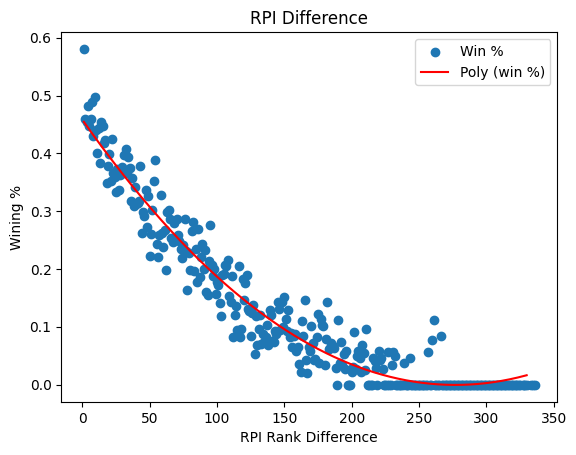

In [601]:
rpi_model = np.poly1d(np.polyfit(rpi_train.rpiDiff, rpi_train.win_perc, 2))
line = np.linspace(1, 330, 500)

plt.scatter(rpi_train.rpiDiff, rpi_train.win_perc, label='Win %')
plt.plot(line, rpi_model(line), c='r', label='Poly (win %)')
plt.xlabel('RPI Rank Difference')
plt.ylabel('Wining %')
plt.legend(loc='best')
plt.title('RPI Difference')
plt.show()

Na gotovo identičan način dobivamo win percentage i za ostale varijable, te ih uvrštavamo u funkciju regresije i učimo naše modele

In [602]:
train_data

,season,wteam,lteam,wpts,wst,wblks,wfg,lpts,lst,lblks,lfg,wRpiRank,lRpiRank
0,2011,1228,1414,71.0,5.5,4.5,46.8,74.6,6.5,1.7,41.9,41.0,289.0
1,2011,1334,1414,64.8,4.4,1.8,43.4,74.6,6.5,1.7,41.9,201.0,289.0
2,2011,1363,1414,71.7,5.4,2.4,40.0,74.6,6.5,1.7,41.9,157.0,289.0
3,2011,1364,1414,67.3,7.2,4.1,44.8,74.6,6.5,1.7,41.9,163.0,289.0
4,2011,1417,1414,70.1,5.4,5.8,45.5,74.6,6.5,1.7,41.9,38.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,2014,1233,1264,83.5,6.6,3.7,48.7,77.4,8.3,6.1,45.1,74.0,64.0
21317,2014,1373,1264,69.9,5.9,4.6,42.1,77.4,8.3,6.1,45.1,187.0,64.0
21318,2014,1203,1264,73.4,7.1,4.2,46.4,77.4,8.3,6.1,45.1,33.0,64.0
21319,2014,1200,1264,71.7,6.7,4.1,39.3,77.4,8.3,6.1,45.1,202.0,64.0


In [603]:
first_time = True
for season in range(2011,2015):
    tmp = variables_per_team.loc[variables_per_team.season == season, ["team", "season", "PTS"]].sort_values(by= "PTS", ascending=False)
    tmp.loc[:, "ptsRank"] = tmp["PTS"].rank(method='min', ascending = False)
    tmp = tmp.drop(columns="PTS")
    if first_time: 
        pts_rank = tmp.copy()
        first_time = False
    else:
        pts_rank = pd.concat([pts_rank, tmp])


train_data = train_data.merge(pts_rank, left_on=["season", "wteam"], right_on=["season", "team"], how= "left")
train_data = train_data.drop(columns= ["team"]).rename(columns={"ptsRank": "wPtsRank"})

train_data = train_data.merge(pts_rank, left_on=["season", "lteam"], right_on=["season", "team"], how= "left")
train_data = train_data.drop(columns= ["team"]).rename(columns={"ptsRank": "lPtsRank"})
train_data


,season,wteam,lteam,wpts,wst,wblks,wfg,lpts,lst,lblks,lfg,wRpiRank,lRpiRank,wPtsRank,lPtsRank
0,2011,1228,1414,71.0,5.5,4.5,46.8,74.6,6.5,1.7,41.9,41.0,289.0,94.0,38.0
1,2011,1334,1414,64.8,4.4,1.8,43.4,74.6,6.5,1.7,41.9,201.0,289.0,261.0,38.0
2,2011,1363,1414,71.7,5.4,2.4,40.0,74.6,6.5,1.7,41.9,157.0,289.0,73.0,38.0
3,2011,1364,1414,67.3,7.2,4.1,44.8,74.6,6.5,1.7,41.9,163.0,289.0,197.0,38.0
4,2011,1417,1414,70.1,5.4,5.8,45.5,74.6,6.5,1.7,41.9,38.0,289.0,116.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,2014,1233,1264,83.5,6.6,3.7,48.7,77.4,8.3,6.1,45.1,74.0,64.0,3.0,30.0
21317,2014,1373,1264,69.9,5.9,4.6,42.1,77.4,8.3,6.1,45.1,187.0,64.0,179.0,30.0
21318,2014,1203,1264,73.4,7.1,4.2,46.4,77.4,8.3,6.1,45.1,33.0,64.0,79.0,30.0
21319,2014,1200,1264,71.7,6.7,4.1,39.3,77.4,8.3,6.1,45.1,202.0,64.0,126.0,30.0


In [604]:
pts_train = train_data[['wPtsRank', 'lPtsRank']]
tmp = pts_train.copy()
pts_train.loc[:,'pts_diff'] = tmp.loc[:,'wPtsRank'] - tmp.loc[:,'lPtsRank']
pts_train = pts_train.groupby('pts_diff', as_index=False)['wPtsRank'].count().rename(columns={'wPtsRank': 'count'})

pts_train_neg = pts_train[pts_train.pts_diff < 0]
pts_train_neg = pts_train_neg.rename(columns={'count':'count-'})
pts_train_pos = pts_train[pts_train.pts_diff > 0]
pts_train_pos = pts_train_pos.rename(columns={'count':'count+'})

pts_train_neg['pts_diff'] = abs(pts_train_neg['pts_diff'])

pts_train = pd.merge(pts_train_neg, pts_train_pos, how='outer', on='pts_diff')

pts_train.loc[pts_train['count-'].isna(), 'count-'] = 0
pts_train.loc[pts_train['count+'].isna(), 'count+'] = 0
pts_train

tmp = pts_train.copy()
pts_train['win_perc'] = tmp['count-'] / (tmp['count+'] + tmp['count-'])
pts_train

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\2249484344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pts_train.loc[:,'pts_diff'] = tmp.loc[:,'wPtsRank'] - tmp.loc[:,'lPtsRank']


,pts_diff,count-,count+,win_perc
0,344.0,2,0.0,1.000000
1,343.0,1,0.0,1.000000
2,342.0,2,0.0,1.000000
3,341.0,1,0.0,1.000000
4,340.0,2,0.0,1.000000
...,...,...,...,...
336,5.0,62,74.0,0.455882
337,4.0,64,63.0,0.503937
338,3.0,48,58.0,0.452830
339,2.0,37,49.0,0.430233


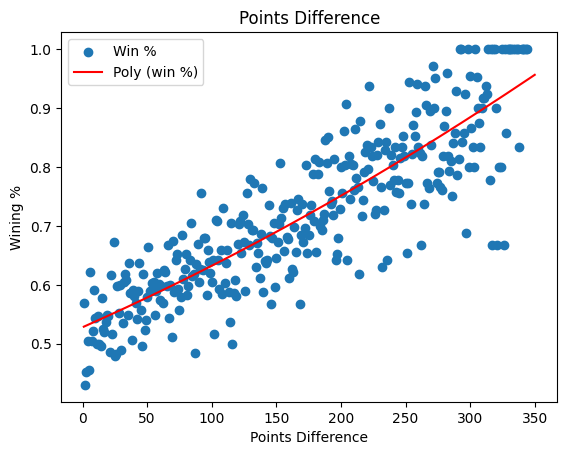

In [605]:
pts_model = np.poly1d(np.polyfit(pts_train.pts_diff, pts_train.win_perc, 2))
line = np.linspace(1, 350, 500)

plt.scatter(pts_train.pts_diff, pts_train.win_perc, label='Win %')
plt.plot(line, pts_model(line), c='r', label='Poly (win %)')
plt.xlabel('Points Difference')
plt.ylabel('Wining %')
plt.legend(loc='best')
plt.title('Points Difference')
plt.show()

In [606]:
st_train = train_data[['wst', 'lst']]
st_train.loc[:,'st_diff'] = st_train.loc[:,'wst'] - st_train.loc[:, 'lst']
st_train = st_train.groupby('st_diff', as_index=False)['wst'].count()

st_train_neg = st_train[st_train.st_diff < 0]
st_train_neg = st_train_neg.rename(columns={'wst':'count-'})
st_train_pos = st_train[st_train.st_diff > 0]
st_train_pos = st_train_pos.rename(columns={'wst':'count+'})

st_train_neg['st_diff'] = abs(st_train['st_diff'])

st_train = pd.merge(st_train_neg, st_train_pos, how='outer', on='st_diff')

st_train.loc[st_train['count-'].isna(), 'count-'] = 0
st_train.loc[st_train['count+'].isna(), 'count+'] = 0
st_train

tmp = st_train.copy()
st_train['win_perc'] = tmp['count+'] / (tmp['count+'] + tmp['count-'])
st_train.sort_values(by='st_diff')

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\1084186525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st_train.loc[:,'st_diff'] = st_train.loc[:,'wst'] - st_train.loc[:, 'lst']


,st_diff,count-,count+,win_perc
175,0.1,332.0,320.0,0.490798
174,0.1,1.0,0.0,0.000000
173,0.1,185.0,206.0,0.526854
172,0.1,4.0,1.0,0.200000
171,0.2,107.0,112.0,0.511416
...,...,...,...,...
199,6.5,0.0,3.0,1.000000
0,6.7,2.0,0.0,0.000000
200,6.8,0.0,2.0,1.000000
201,7.1,0.0,1.0,1.000000


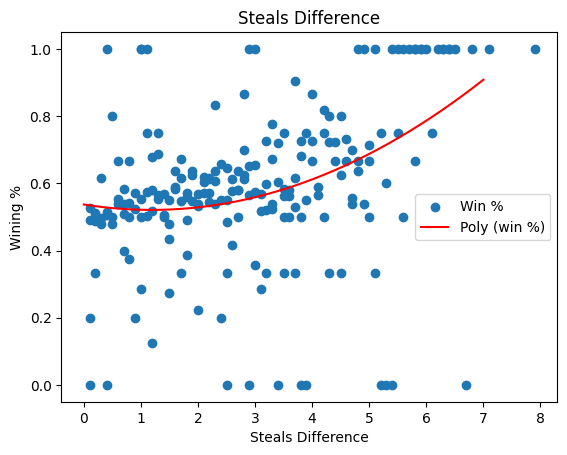

In [607]:
st_model = np.poly1d(np.polyfit(st_train.st_diff, st_train.win_perc, 2))
line = np.linspace(0, 7, 500)

plt.scatter(st_train.st_diff, st_train.win_perc, label='Win %')
plt.plot(line, st_model(line), c='r', label='Poly (win %)')
plt.xlabel('Steals Difference')
plt.ylabel('Wining %')
plt.legend(loc='best')
plt.title('Steals Difference')
plt.show()

In [608]:
blks_train = train_data[['wblks', 'lblks']]
blks_train.loc[:,'blks_diff'] = blks_train.loc[:,'wblks'] - blks_train.loc[:, 'lblks']
blks_train = blks_train.groupby('blks_diff', as_index=False)['wblks'].count()

train_neg = blks_train[blks_train.blks_diff < 0]
train_neg = train_neg.rename(columns={'wblks':'count-'})
train_pos = blks_train[blks_train.blks_diff > 0]
train_pos = train_pos.rename(columns={'wblks':'count+'})

train_neg['blks_diff'] = abs(blks_train['blks_diff'])

blks_train = pd.merge(train_neg, train_pos, how='outer', on='blks_diff')

blks_train.loc[blks_train['count-'].isna(), 'count-'] = 0
blks_train.loc[blks_train['count+'].isna(), 'count+'] = 0
blks_train

tmp = blks_train.copy()
blks_train['win_perc'] = tmp['count+'] / (tmp['count+'] + tmp['count-'])
blks_train.sort_values(by='blks_diff')

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\521241104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blks_train.loc[:,'blks_diff'] = blks_train.loc[:,'wblks'] - blks_train.loc[:, 'lblks']


,blks_diff,count-,count+,win_perc
154,0.1,151.0,155.0,0.506536
153,0.1,12.0,14.0,0.538462
152,0.1,369.0,392.0,0.515112
151,0.1,40.0,52.0,0.565217
150,0.2,7.0,14.0,0.666667
...,...,...,...,...
1,6.0,1.0,3.0,0.750000
171,6.1,0.0,1.0,1.000000
0,6.2,1.0,2.0,0.666667
172,6.6,0.0,1.0,1.000000


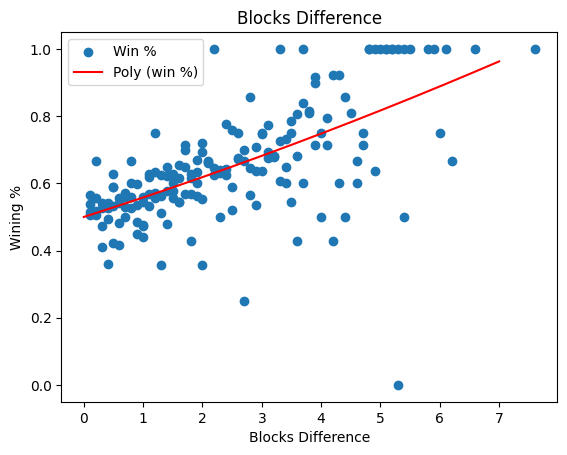

In [609]:
blks_model = np.poly1d(np.polyfit(blks_train.blks_diff, blks_train.win_perc, 2))
line = np.linspace(0, 7, 500)

plt.scatter(blks_train.blks_diff, blks_train.win_perc, label='Win %')
plt.plot(line, blks_model(line), c='r', label='Poly (win %)')
plt.xlabel('Blocks Difference')
plt.ylabel('Wining %')
plt.legend(loc='best')
plt.title('Blocks Difference')
plt.show()

In [610]:
fg_train = train_data[['wfg', 'lfg']]
fg_train.loc[:,'fg_diff'] = fg_train.loc[:,'wfg'] - fg_train.loc[:, 'lfg']
fg_train = fg_train.groupby('fg_diff', as_index=False)['wfg'].count()

train_neg = fg_train[fg_train.fg_diff < 0]
train_neg = train_neg.rename(columns={'wfg':'count-'})
train_pos = fg_train[fg_train.fg_diff > 0]
train_pos = train_pos.rename(columns={'wfg':'count+'})

train_neg['fg_diff'] = abs(fg_train['fg_diff'])

fg_train = pd.merge(train_neg, train_pos, how='outer', on='fg_diff')

fg_train.loc[fg_train['count-'].isna(), 'count-'] = 0
fg_train.loc[fg_train['count+'].isna(), 'count+'] = 0
fg_train

tmp = fg_train.copy()
fg_train['win_perc'] = tmp['count+'] / (tmp['count+'] + tmp['count-'])
fg_train.sort_values(by='fg_diff')

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\3500438720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_train.loc[:,'fg_diff'] = fg_train.loc[:,'wfg'] - fg_train.loc[:, 'lfg']


,fg_diff,count-,count+,win_perc
160,0.1,51.0,39.0,0.433333
159,0.1,214.0,206.0,0.490476
158,0.2,91.0,97.0,0.515957
157,0.2,154.0,148.0,0.490066
156,0.3,143.0,138.0,0.491103
...,...,...,...,...
200,12.0,0.0,1.0,1.000000
201,12.2,0.0,1.0,1.000000
202,12.4,0.0,1.0,1.000000
0,12.4,1.0,0.0,0.000000


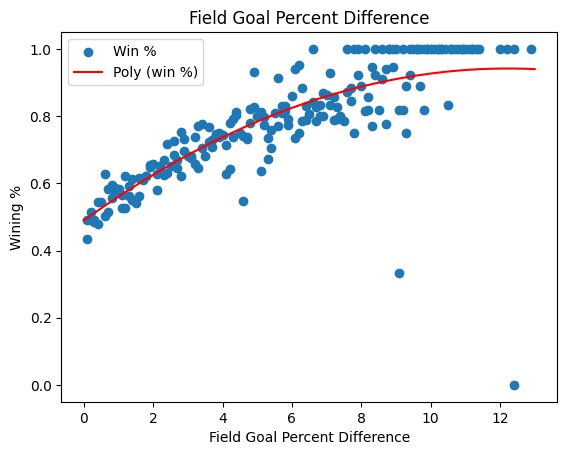

In [611]:
fg_model = np.poly1d(np.polyfit(fg_train.fg_diff, fg_train.win_perc, 2))
line = np.linspace(0, 13, 500)

plt.scatter(fg_train.fg_diff, fg_train.win_perc, label='Win %')
plt.plot(line, fg_model(line), c='r', label='Poly (win %)')
plt.xlabel('Field Goal Percent Difference')
plt.ylabel('Wining %')
plt.legend(loc='best')
plt.title('Field Goal Percent Difference')
plt.show()

Sada imamo 5 modela: **rpi_model, pts_model, st_model, blks_model i fg_model**. Sada možemo izabrati neki novi set podataka i na temelju dobivenih modela obaviti predikciju za utakmice u tom novom skupu podataka. Odabrao sam skup podataka koji prikazuje turnirske utakmice u sezoni 2014.

In [612]:
tourney_2014_results = pd.read_csv('./data/proj2/tourney_detailed_results.csv')
tourney_2014_results = tourney_2014_results[tourney_2014_results.season == 2014]
tourney_2014_results

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
713,2014,134,1107,71,1291,64,N,0,27,47,...,37,8,12,6,17,13,4,3,1,16
714,2014,134,1301,74,1462,59,N,0,29,53,...,14,11,16,11,20,7,13,3,0,17
715,2014,135,1142,81,1411,69,N,0,29,51,...,13,17,22,11,16,12,13,3,1,23
716,2014,135,1397,78,1234,65,N,1,24,54,...,16,13,15,7,23,14,6,2,2,28
717,2014,136,1163,89,1386,81,N,1,30,66,...,21,20,27,9,24,12,14,3,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,146,1163,60,1277,54,N,0,17,49,...,29,7,8,6,26,13,16,5,3,16
776,2014,146,1246,75,1276,72,N,0,31,58,...,18,11,14,14,10,11,7,4,1,14
777,2014,152,1163,63,1196,53,N,0,24,43,...,10,14,20,12,15,3,11,3,1,14
778,2014,152,1246,74,1458,73,N,0,29,58,...,20,19,20,6,21,11,8,4,3,18


In [613]:
tourney_2014_results = tourney_2014_results[['wteam','lteam']]
tourney_2014_results

,wteam,lteam
713,1107,1291
714,1301,1462
715,1142,1411
716,1397,1234
717,1163,1386
...,...,...
775,1163,1277
776,1246,1276
777,1163,1196
778,1246,1458


Sada dohvaćamo podatke o već izvedenim varijablama iz sezone 2014 te ćemo pomoću njih dobivati našu predikciju.

In [614]:
season_2014_data = train_data[train_data.season == 2014]

season_2014_data_1 = season_2014_data[['wteam', 'wpts', 'wst', 'wblks', 'wfg', 'wRpiRank','wPtsRank']]
season_2014_data_1 = season_2014_data_1.rename(columns={'wteam':'team', 'wpts':'pts', 'wst':'st', 'wblks':'blks', 
                                                'wfg':'fg', 'wRpiRank':'rpiRank', 'wPtsRank': 'ptsRank'})
season_2014_data_1

season_2014_data_2 = season_2014_data[['lteam', 'lpts', 'lst', 'lblks', 'lfg', 'lRpiRank', 'lPtsRank']]
season_2014_data_2 = season_2014_data_2.rename(columns={'lteam':'team', 'lpts':'pts', 'lst':'st', 'lblks':'blks', 
                                                'lfg':'fg', 'lRpiRank':'rpiRank', 'lPtsRank': 'ptsRank'})
season_2014_data_2

season_2014_data = pd.concat([season_2014_data_1, season_2014_data_2]).drop_duplicates()
season_2014_data

,team,pts,st,blks,fg,rpiRank,ptsRank
15992,1102,64.6,5.3,3.0,42.6,230.0,296.0
15993,1323,72.0,5.8,3.0,45.5,108.0,119.0
15994,1353,69.7,5.8,4.4,42.0,155.0,185.0
15995,1162,67.1,5.0,2.8,44.1,128.0,253.0
15996,1131,71.5,7.1,1.8,45.3,82.0,136.0
...,...,...,...,...,...,...,...
19154,1226,69.6,6.7,2.6,44.2,290.0,189.0
19272,1227,65.4,5.2,1.8,40.9,320.0,286.0
19660,1402,60.4,5.9,2.8,42.9,300.0,342.0
19782,1237,63.2,4.9,2.8,42.7,322.0,321.0


Nakon toga za svaku utakmicu u turniru 2014-e moramo pronaći razliku varijabli jer ćemo razliku varijabli davati našim modelima i na temelju toga dobiti predikciju. **Tourney_2014_results** prikazuje sve potrebne podatke koji su nam potrebni da bi napravili predikciju za utakmice turnira 2014.

In [615]:
tmp = tourney_2014_results.copy()

for i, game in tmp.iterrows():
    if not (season_2014_data[season_2014_data.team == game['wteam']]).empty:
        if not (season_2014_data[season_2014_data.team == game['lteam']]).empty:
       
            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'rpiDiff'] = int(season_2014_data[season_2014_data.team == game['lteam']]['rpiRank']) - int(season_2014_data[season_2014_data.team == game['wteam']]['rpiRank'])

            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'ptsDiff'] = int(season_2014_data[season_2014_data.team == game['wteam']]['pts']) - int(season_2014_data[season_2014_data.team == game['lteam']]['pts'])

            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'stDiff'] = float(season_2014_data[season_2014_data.team == game['wteam']]['st']) - float(season_2014_data[season_2014_data.team == game['lteam']]['st'])

            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'blksDiff'] = float(season_2014_data[season_2014_data.team == game['wteam']]['blks']) - float(season_2014_data[season_2014_data.team == game['lteam']]['blks'])

            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'fgDiff'] = float(season_2014_data[season_2014_data.team == game['wteam']]['fg']) - float(season_2014_data[season_2014_data.team == game['lteam']]['fg'])
            
            tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']), 
                                     'pts2Diff'] = int(season_2014_data[season_2014_data.team == game['wteam']]['ptsRank']) - int(season_2014_data[season_2014_data.team == game['lteam']]['ptsRank'])

tourney_2014_results = tourney_2014_results.loc[tourney_2014_results.rpiDiff.notnull(), :]
tourney_2014_results

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\2825552079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']),
C:\Users\PC\AppData\Local\Temp\ipykernel_11248\2825552079.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_2014_results.loc[(tourney_2014_results.wteam == game['wteam']) & (tourney_2014_results.lteam == game['lteam']),
C:\Users\PC\AppData\Local\Temp\ipykernel_11248\2825

,wteam,lteam,rpiDiff,ptsDiff,stDiff,blksDiff,fgDiff,pts2Diff
713,1107,1291,9.0,-10.0,-1.7,0.0,-0.2,231.0
714,1301,1462,1.0,-2.0,-1.0,1.1,-1.2,48.0
715,1142,1411,38.0,-13.0,0.9,-0.8,-5.4,272.0
716,1397,1234,18.0,-12.0,-2.0,-0.4,-2.3,158.0
717,1163,1386,9.0,0.0,2.5,1.6,-2.1,-25.0
...,...,...,...,...,...,...,...,...
775,1163,1277,-8.0,-4.0,0.1,1.4,-2.7,79.0
776,1246,1276,-6.0,1.0,-0.3,3.7,-2.5,-26.0
777,1163,1196,-19.0,1.0,-0.2,3.3,-1.4,-38.0
778,1246,1458,-11.0,2.0,-0.2,2.7,-0.7,-34.0


Sada za svaku utakmicu u tourney_2014_results radimo predikciju po svakoj varijabli pomoću gore dobivenih modela. Kada izračunamo predikciju po svakoj varijabli, jednostavnim računanjem aritmetičke sredine svih predikcija dobivamo win percentage tima koji je pobijedio. Ako nam je win percentage ispao veći od 50%, to znači da je naša predikcija točna i da smo pogodili pobjednika utakmice.

In [616]:
tmp = tourney_2014_results.copy()

for i, result in tmp.iterrows():
    x = float(result['rpiDiff'])
    rpi = 0
    if(x <= 0):
        rpi = 1 - rpi_model(x)
    else:
        rpi = rpi_model(x)
        
        
    x = float(result['pts2Diff'])
    pts = 0
    if(x <= 0):
        pts = 1 - pts_model(x)
    else:
        pts = pts_model(x)
        
    
    x = float(result['stDiff'])
    st = 0
    if(x <= 0):
        st = 1 - st_model(x)
    else:
        st = st_model(x)
        
    
    x = float(result['blksDiff'])
    blks = 0
    if(x <= 0):
        blks = 1 - blks_model(x)
    else:
        blks = blks_model(x)
        
        
    x = float(result['fgDiff'])
    fg = 0
    if(x <= 0):
        fg = 1 - fg_model(x)
    else:
        fg = fg_model(x)
        
        
    pred = (0.2*rpi + 0.2*pts + 0.2*st + 0.2*blks + 0.2*fg)
    
    tourney_2014_results.loc[(tourney_2014_results.wteam == result['wteam']) & (tourney_2014_results.lteam == result['lteam']), 
                             'pred'] = pred
    
tourney_2014_results

C:\Users\PC\AppData\Local\Temp\ipykernel_11248\1481874299.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_2014_results.loc[(tourney_2014_results.wteam == result['wteam']) & (tourney_2014_results.lteam == result['lteam']),


,wteam,lteam,rpiDiff,ptsDiff,stDiff,blksDiff,fgDiff,pts2Diff,pred
713,1107,1291,9.0,-10.0,-1.7,0.0,-0.2,231.0,0.525618
714,1301,1462,1.0,-2.0,-1.0,1.1,-1.2,48.0,0.524452
715,1142,1411,38.0,-13.0,0.9,-0.8,-5.4,272.0,0.650059
716,1397,1234,18.0,-12.0,-2.0,-0.4,-2.3,158.0,0.536224
717,1163,1386,9.0,0.0,2.5,1.6,-2.1,-25.0,0.547562
...,...,...,...,...,...,...,...,...,...
775,1163,1277,-8.0,-4.0,0.1,1.4,-2.7,79.0,0.594594
776,1246,1276,-6.0,1.0,-0.3,3.7,-2.5,-26.0,0.582941
777,1163,1196,-19.0,1.0,-0.2,3.3,-1.4,-38.0,0.552666
778,1246,1458,-11.0,2.0,-0.2,2.7,-0.7,-34.0,0.538499


Nakon malo uglađivanja dobivamo finalnu tablicu i finalni postotak pogođenog ishoda utakmice. Finalni postotak pogođenih ishoda je veći nego u članku iz ne znam kojeg razloga, možda je moja greška, možda je upotreba drugog skupa podataka za predikciju.

In [617]:
final = tourney_2014_results[['wteam', 'lteam', 'pred']]
final = pd.merge(final, teams, left_on='wteam', right_on='team_id').drop(columns=['wteam', 'team_id']).rename(columns={'team_name':'wteam'})
final = pd.merge(final, teams, left_on='lteam', right_on='team_id').drop(columns=['lteam', 'team_id']).rename(columns={'team_name':'lteam'})
final = final.iloc[:, [1,2,0]]
final.loc[final.pred > 0.5, 'correct'] = 1
final.loc[final.pred <= 0.5, 'correct'] = 0
pd.set_option('display.max_rows', None)
final

,wteam,lteam,pred,correct
0,Albany NY,Mt St Mary's,0.525618,1.0
1,NC State,Xavier,0.524452,1.0
2,Cal Poly SLO,TX Southern,0.650059,1.0
3,Tennessee,Iowa,0.536224,1.0
4,Tennessee,Massachusetts,0.547938,1.0
5,Tennessee,Mercer,0.524057,1.0
6,Connecticut,St Joseph's PA,0.547562,1.0
7,Connecticut,Villanova,0.576205,1.0
8,Connecticut,Iowa St,0.614244,1.0
9,Connecticut,Michigan St,0.594594,1.0


In [618]:
pd.set_option('display.max_rows', 10)
print('Pogođene utakmice: ', len(tourney_2014_results[tourney_2014_results.pred > 0.5].index))
print('Odigrane utakmice: ', len(tourney_2014_results.index))
print('Postotak pogođenog: ', round(len(tourney_2014_results[tourney_2014_results.pred > 0.5].index) / len(tourney_2014_results.index) * 100,2), '%')

Pogođene utakmice:  51
Odigrane utakmice:  65
Postotak pogođenog:  78.46 %





# Treći dio projekta - poboljšanje rezultata

U trećem dijelu projekta pokušat ćemo poboljšati gore dobivene rezultate. Pokušat ćemo koristiti neku drugu funkciju regresije, vidjeti kako se one ponašaju i pronaći najbolji mogući rezultat.


## Algoritam slučajnih šuma

Umjesto gore upotrebljene polinominalne funkcije regresije koristit ćemo regresiju algoritmom slučajnih šuma. Koristit ćemo iste varijable kao u drugom dijelu projekta (RPI rank difference, points difference, average steals difference, average blocks difference, field goal percent difference), ali ćemo ih provući kroz drukčiju funkciju regresije i vidjeti jesmo li dobili ikakva poboljšanja.

In [619]:
from sklearn.ensemble import RandomForestRegressor


x= rpi_train.iloc [:, : 1].to_numpy()
y= rpi_train.win_perc.to_numpy()

rpi_forest_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
rpi_forest_model.fit(x, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [620]:
x= pts_train.iloc [:, : 1].to_numpy()
y= pts_train.win_perc.to_numpy()

pts_forest_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
pts_forest_model.fit(x, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [621]:
x= st_train.iloc [:, : 1].to_numpy()
y= st_train.win_perc.to_numpy()

st_forest_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
st_forest_model.fit(x, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [622]:
x= blks_train.iloc [:, : 1].to_numpy()
y= blks_train.win_perc.to_numpy()

blks_forest_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
blks_forest_model.fit(x, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [623]:
x= fg_train.iloc [:, : 1].to_numpy()
y= fg_train.win_perc.to_numpy()

fg_forest_model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
fg_forest_model.fit(x, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [624]:
tmp = tourney_2014_results.copy()

for i, result in tmp.iterrows():
    x = float(result['rpiDiff'])
    rpi = 0
    if(x <= 0):
        rpi = 1 - rpi_forest_model.predict(np.array([x]).reshape(1, 1))
    else:
        rpi = rpi_forest_model.predict(np.array([x]).reshape(1, 1))
        
        
    x = float(result['pts2Diff'])
    pts = 0
    if(x <= 0):
        pts = 1 - pts_forest_model.predict(np.array([x]).reshape(1, 1))
    else:
        pts = pts_forest_model.predict(np.array([x]).reshape(1, 1))
        
    
    x = float(result['stDiff'])
    st = 0
    if(x <= 0):
        st = 1 - st_forest_model.predict(np.array([x]).reshape(1, 1))
    else:
        st = st_forest_model.predict(np.array([x]).reshape(1, 1))
        
    
    x = float(result['blksDiff'])
    blks = 0
    if(x <= 0):
        blks = 1 - blks_forest_model.predict(np.array([x]).reshape(1, 1))
    else:
        blks = blks_forest_model.predict(np.array([x]).reshape(1, 1))
        
        
    x = float(result['fgDiff'])
    fg = 0
    if(x <= 0):
        fg = 1 - fg_forest_model.predict(np.array([x]).reshape(1, 1))
    else:
        fg = fg_forest_model.predict(np.array([x]).reshape(1, 1))
        
        
    pred = (0.2*rpi + 0.2*pts + 0.2*st + 0.2*blks + 0.2*fg)
    
    tourney_2014_results.loc[(tourney_2014_results.wteam == result['wteam']) & (tourney_2014_results.lteam == result['lteam']), 
                             'pred'] = pred
    
tourney_2014_results

,wteam,lteam,rpiDiff,ptsDiff,stDiff,blksDiff,fgDiff,pts2Diff,pred
713,1107,1291,9.0,-10.0,-1.7,0.0,-0.2,231.0,0.578926
714,1301,1462,1.0,-2.0,-1.0,1.1,-1.2,48.0,0.575750
715,1142,1411,38.0,-13.0,0.9,-0.8,-5.4,272.0,0.543590
716,1397,1234,18.0,-12.0,-2.0,-0.4,-2.3,158.0,0.542665
717,1163,1386,9.0,0.0,2.5,1.6,-2.1,-25.0,0.516738
...,...,...,...,...,...,...,...,...,...
775,1163,1277,-8.0,-4.0,0.1,1.4,-2.7,79.0,0.509869
776,1246,1276,-6.0,1.0,-0.3,3.7,-2.5,-26.0,0.577666
777,1163,1196,-19.0,1.0,-0.2,3.3,-1.4,-38.0,0.567254
778,1246,1458,-11.0,2.0,-0.2,2.7,-0.7,-34.0,0.540124


In [625]:
pd.set_option('display.max_rows', 10)
print("Korištenje regresijskog algoritma slučajnih šuma kako bi poboljšali rezultate:\n")
print('Pogođene utakmice: ', len(tourney_2014_results[tourney_2014_results.pred > 0.5].index))
print('Odigrane utakmice: ', len(tourney_2014_results.index))
print('Postotak pogođenog: ', round(len(tourney_2014_results[tourney_2014_results.pred > 0.5].index) / len(tourney_2014_results.index) * 100,2), '%\n')
print("Zaključak: Dvije utakmice više pogođene.")

Korištenje regresijskog algoritma slučajnih šuma kako bi poboljšali rezultate:

Pogođene utakmice:  53
Odigrane utakmice:  65
Postotak pogođenog:  81.54 %

Zaključak: Dvije utakmice više pogođene.


Vidimo da smo pogodili dvije utakmice više u odnosu na istu stvar kada smo koristili polinomijalnu funkciju regresije, što nije loš rezulat s obziron na minimalne promjene.

## K-NN model

U drugom pokušaju pokušat ćemo regresiju obaviti K-NN modelom (k-nearest neighbours). Ovdje ćemo se malo poigrati s argumentom n_neighbours koji model koristi kako bi znao koliko najbližih susjeda će koristiti pri regresiji ulaznog podatka. Ispod su prikazani rezulati regresije u ovisnosti o varijabli n_neighbours te je ta ovisnost grafički prikazana.

In [626]:
from sklearn.neighbors import KNeighborsRegressor

Korištenje regresijskog K-NN algoritma kako bi poboljšali rezultate:

Pokušaj s n_neighbours = 2
	Pogođene utakmice: 49
	Odigrane utakmice: 65
	Postotak pogođenog: 75.38 %

Pokušaj s n_neighbours = 3
	Pogođene utakmice: 51
	Odigrane utakmice: 65
	Postotak pogođenog: 78.46 %

Pokušaj s n_neighbours = 4
	Pogođene utakmice: 54
	Odigrane utakmice: 65
	Postotak pogođenog: 83.08 %

Pokušaj s n_neighbours = 5
	Pogođene utakmice: 53
	Odigrane utakmice: 65
	Postotak pogođenog: 81.54 %

Pokušaj s n_neighbours = 6
	Pogođene utakmice: 51
	Odigrane utakmice: 65
	Postotak pogođenog: 78.46 %

Pokušaj s n_neighbours = 7
	Pogođene utakmice: 53
	Odigrane utakmice: 65
	Postotak pogođenog: 81.54 %

Pokušaj s n_neighbours = 8
	Pogođene utakmice: 52
	Odigrane utakmice: 65
	Postotak pogođenog: 80.0 %

Pokušaj s n_neighbours = 9
	Pogođene utakmice: 51
	Odigrane utakmice: 65
	Postotak pogođenog: 78.46 %

Pokušaj s n_neighbours = 10
	Pogođene utakmice: 49
	Odigrane utakmice: 65
	Postotak pogođenog: 75.38 %

Pok

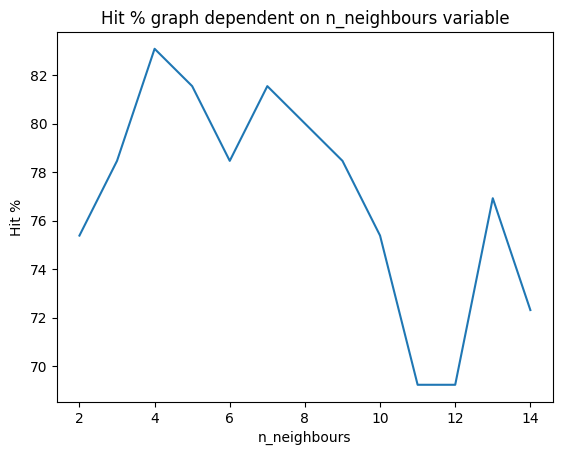

In [627]:
print("Korištenje regresijskog K-NN algoritma kako bi poboljšali rezultate:\n")
graph_x = np.array([])
graph_y = np.array([])

for num in range(2,15):
    
    x= rpi_train.iloc [:, : 1].to_numpy()
    y= rpi_train.win_perc.to_numpy()
    rpi_knn_model = KNeighborsRegressor(num)
    rpi_knn_model.fit(x,y)
    
    x= pts_train.iloc [:, : 1].to_numpy()
    y= pts_train.win_perc.to_numpy()
    pts_knn_model = KNeighborsRegressor(num)
    pts_knn_model.fit(x,y)
    
    x= st_train.iloc [:, : 1].to_numpy()
    y= st_train.win_perc.to_numpy()
    st_knn_model = KNeighborsRegressor(num)
    st_knn_model.fit(x,y)
    
    x= blks_train.iloc [:, : 1].to_numpy()
    y= blks_train.win_perc.to_numpy()
    blks_knn_model = KNeighborsRegressor(num)
    blks_knn_model.fit(x,y)
    
    x= fg_train.iloc [:, : 1].to_numpy()
    y= fg_train.win_perc.to_numpy()
    fg_knn_model = KNeighborsRegressor(num)
    fg_knn_model.fit(x,y)
    
    
    
    tmp = tourney_2014_results.copy()
    tourney_results = tourney_2014_results.copy()

    for i, result in tmp.iterrows():
        x = float(result['rpiDiff'])
        rpi = 0
        if(x <= 0):
            rpi = 1 - rpi_knn_model.predict(np.array([x]).reshape(1, 1))
        else:
            rpi = rpi_knn_model.predict(np.array([x]).reshape(1, 1))


        x = float(result['pts2Diff'])
        pts = 0
        if(x <= 0):
            pts = 1 - pts_knn_model.predict(np.array([x]).reshape(1, 1))
        else:
            pts = pts_knn_model.predict(np.array([x]).reshape(1, 1))


        x = float(result['stDiff'])
        st = 0
        if(x <= 0):
            st = 1 - st_knn_model.predict(np.array([x]).reshape(1, 1))
        else:
            st = st_knn_model.predict(np.array([x]).reshape(1, 1))


        x = float(result['blksDiff'])
        blks = 0
        if(x <= 0):
            blks = 1 - blks_knn_model.predict(np.array([x]).reshape(1, 1))
        else:
            blks = blks_knn_model.predict(np.array([x]).reshape(1, 1))


        x = float(result['fgDiff'])
        fg = 0
        if(x <= 0):
            fg = 1 - fg_knn_model.predict(np.array([x]).reshape(1, 1))
        else:
            fg = fg_knn_model.predict(np.array([x]).reshape(1, 1))


        pred = (0.2*rpi + 0.2*pts + 0.2*st + 0.2*blks + 0.2*fg)

        tourney_results.loc[(tourney_results.wteam == result['wteam']) & (tourney_results.lteam == result['lteam']), 
                                 'pred'] = pred

        
    percentage = round(len(tourney_results[tourney_results.pred > 0.5].index) / len(tourney_results.index) * 100,2)
    graph_x = np.append(graph_x, num)
    graph_y = np.append(graph_y, percentage)

    print("Pokušaj s n_neighbours =", num)
    print('\tPogođene utakmice:', len(tourney_results[tourney_results.pred > 0.5].index))
    print('\tOdigrane utakmice:', len(tourney_results.index))
    print('\tPostotak pogođenog:', percentage, '%\n')
    
    
plt.plot(graph_x, graph_y)
plt.xlabel('n_neighbours')
plt.ylabel('Hit %')
plt.title('Hit % graph dependent on n_neighbours variable')
plt.show()

Vidimo da za vrijednost argumenta n_neighbours = 4 dobivamo najbolje rezultate, čime smo poboljšali početni model za još tri pogođene utakmice.

In [628]:
print("Korištenje regresijskog K-NN algoritma kako bi poboljšali rezultate:\n")
print("Najbolje se pokazao rezultat kad je varijabla n_neighbour = 4.")
print("\tPogođene utakmice: 54\n\tOdigrane utakmice: 65\n\tPostotak pogođenog: 83.08 %\n")
print("Zaključak:")
print("\tTri utakmice više pogođene.")


Korištenje regresijskog K-NN algoritma kako bi poboljšali rezultate:

Najbolje se pokazao rezultat kad je varijabla n_neighbour = 4.
	Pogođene utakmice: 54
	Odigrane utakmice: 65
	Postotak pogođenog: 83.08 %

Zaključak:
	Tri utakmice više pogođene.
